In [26]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [28]:
dir = "../../DroneTrainerNotebooks/data/ok"
files = [ f"{dir}/{file}" for file in os.listdir(dir) ]
classes = None
with open("yolov3.txt", 'r') as f:
    classes = [line.strip() for line in f.readlines()]
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

def get_output_layers(net):
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers
def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = str(classes[class_id])
    color = COLORS[class_id]
    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)
    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [29]:
n = 1
image = cv2.imread(files[n])
Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392

blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)
net.setInput(blob)
outs = net.forward(get_output_layers(net))

class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])
            
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
for i in indices:
    i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    draw_prediction(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

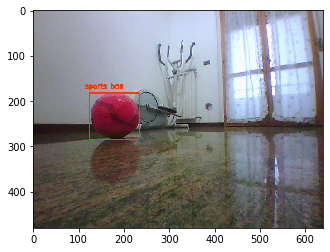

In [34]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))